### Forecasting Procedure
 - choose the model
 - split the data into training and test
 - fit the model on training data
 - evaluate the model on testing data
 - re-fit the model on entire data
 - forecast for future data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
airline = pd.read_csv('data/airline_passengers.csv', index_col= 'Month', parse_dates= True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
# we will do monthly forecast so set the freq = 'MS'
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [6]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


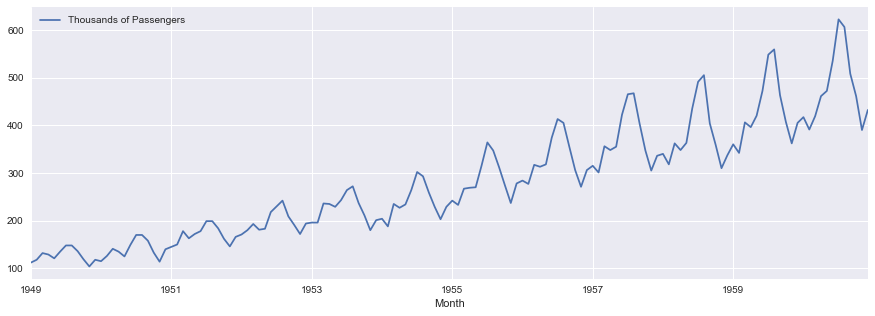

In [11]:
airline.plot(figsize = (15,5))
plt.show()

### split the data into train and test

In [12]:
# just remember the index rules in pandas 
train_data = airline.iloc[:109]
test_data  = airline.iloc[108:]

In [14]:
train_data.shape

(109, 1)

In [15]:
test_data.shape

(36, 1)

### model building

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend= 'mul', seasonal= 'mul',seasonal_periods= 12).fit()

In [19]:
test_predictions = fitted_model.forecast(36) # 12 means 1 yesr, if you want 3 years then 36 periods

### plotting

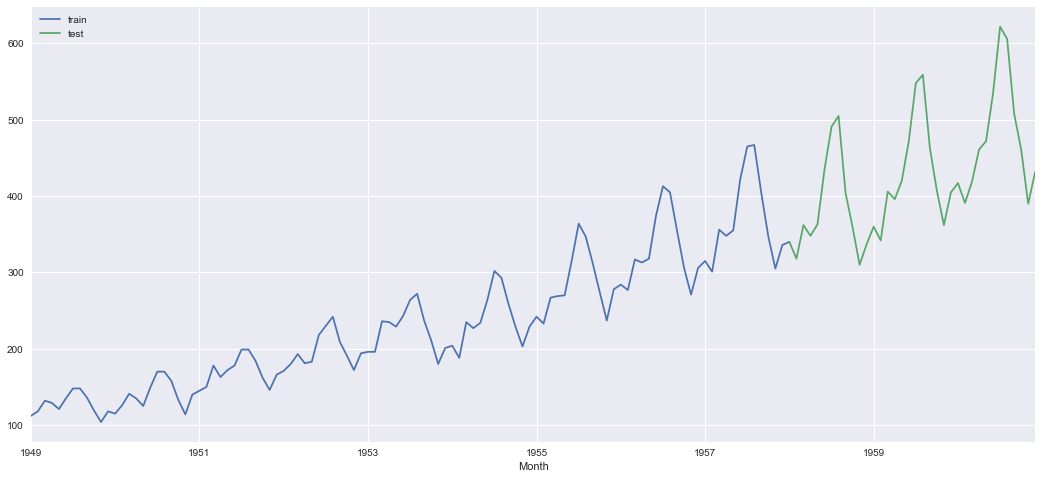

In [25]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'train', figsize = (18,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'test')
plt.show()

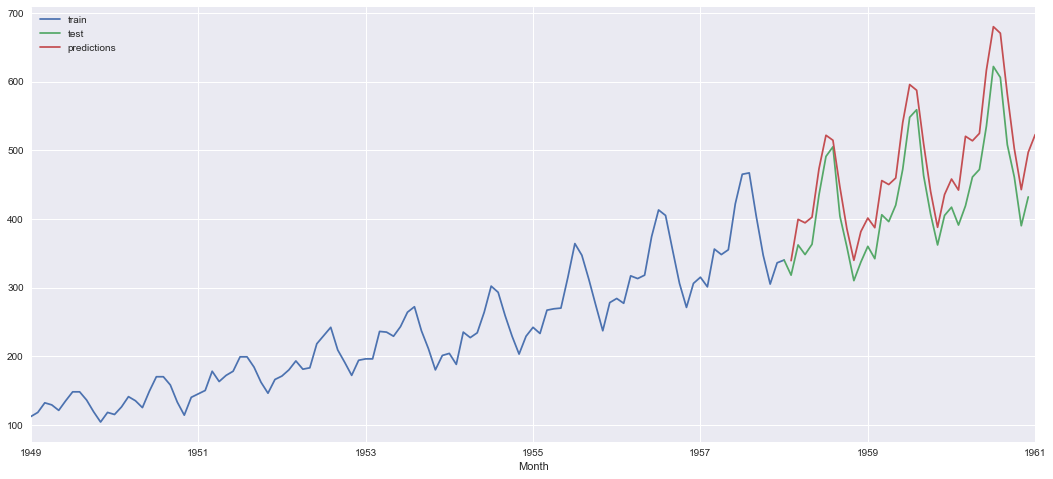

In [27]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'train', figsize = (18,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'test')
test_predictions.plot(legend = True, label = 'predictions')
plt.show()

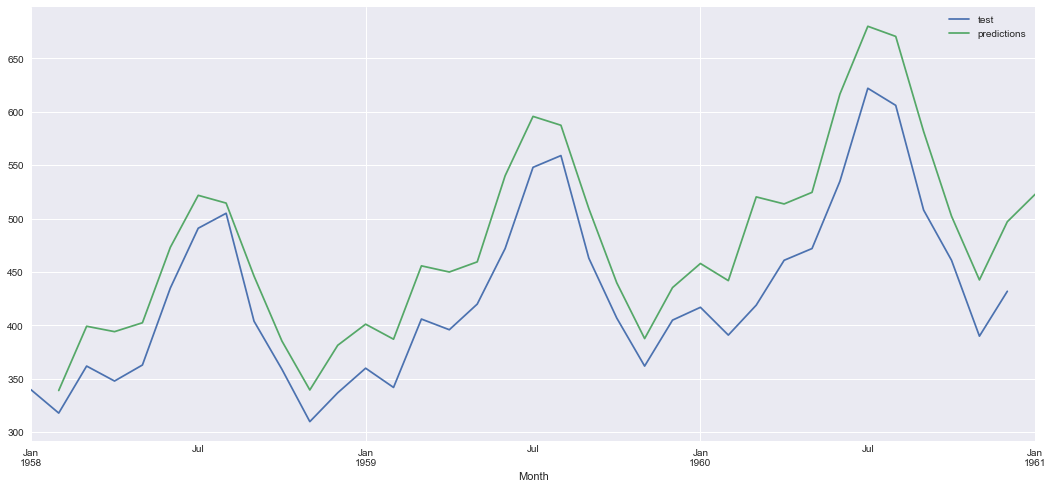

In [28]:
# checking exactly where I m forecasting
test_data['Thousands of Passengers'].plot(legend = True, label = 'test', figsize = (18,8))
test_predictions.plot(legend = True, label = 'predictions', xlim = ['1958-01-01','1961-01-01'])
plt.show()

### Evaluation / error metrics
### How do we evaluate future forecasting results?
 - we **can't** beacause those dates aren't happend yet to evaluate! 

In [29]:
test_data.shape

(36, 1)

In [30]:
test_predictions.shape

(36,)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
print('MAE : {}'.format(mean_absolute_error(test_data, test_predictions)))
print('MSE : {}'.format(mean_squared_error(test_data, test_predictions)))
print('RMSE : {}'.format(np.sqrt(mean_absolute_error(test_data, test_predictions))))

MAE : 63.0282862810754
MSE : 5613.837862455122
RMSE : 7.939035601449045


### Re-fit the model on entire data

In [35]:
fitted_model = ExponentialSmoothing(airline['Thousands of Passengers'],
                                   trend='mul', seasonal= 'mul', seasonal_periods= 12).fit()

In [36]:
forecast_predictions = fitted_model.forecast(36) # meaning 3 years i.e 36 periods

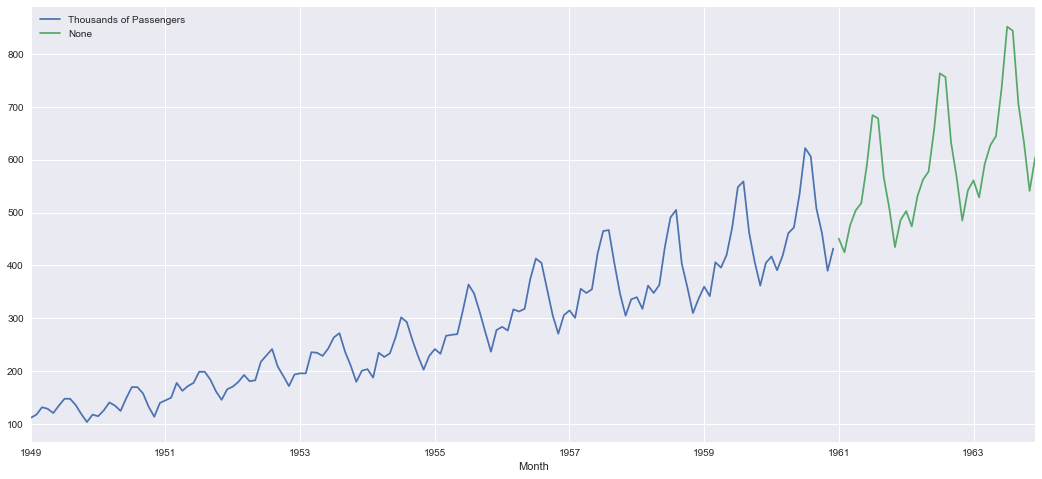

In [39]:
airline['Thousands of Passengers'].plot(figsize = (18,8))
forecast_predictions.plot()
plt.legend()
plt.show()